# Tugas Computer Vision - Segmentasi dengan Warna dan Manipulasi Dasar Citra

## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Save as... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: ANDYCA PURWOKO
### NIM: A710190092

#### Lengkapi kode di bawah dan jalankan
#### Kamu perlu memahami apa yang dijelaskan di video yang sudah dibagi:

In [1]:
from time import ctime
from os import getcwd
import sys
nama = "ANDYCA PURWOKO"
NIM = "A710190092"    
kota = "Sampit"    
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: ANDYCA PURWOKO
NIM : A710190092
Kota: Sampit
Sat Mar 26 16:39:37 2022

D:\KULIAH\computer_vision\New folder (3)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe
3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]


##  Import the libraries

In [2]:
## Silakan import semua library yang diperlukan di cell ini
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Color segmentation

### Memakai OpenCV, extractlah bunga warna kuning pada file yang sudah disertakan

In [3]:
## Buka Florist_Shop.jpg
#  Convert ke HSV
#  Tentukan nilai H,S,V untuk warna yang akan diextract.
#  Extract bunga warna kuning. Tampilkan mask-nya, hasil extract, dan gambar asli.
im_bunga = cv2.imread('Florist_Shop.jpg')
im_bunga.shape

(416, 740, 3)

In [4]:
hsv_bunga = cv2.cvtColor(im_bunga,cv2.COLOR_BGR2HSV)

In [5]:
hsv_bunga.shape

(416, 740, 3)

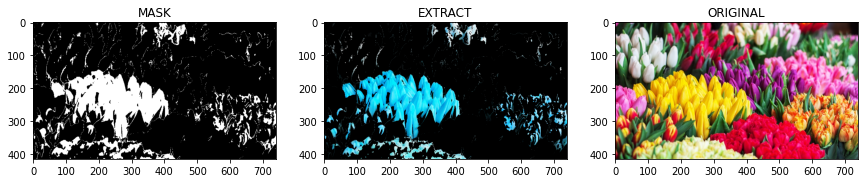

In [6]:
kuning_bawah = np.array([20,0,0])
kuning_atas  = np.array([30,255,255])
mask1= cv2.inRange(hsv_bunga,kuning_bawah,kuning_atas)
res =  cv2.bitwise_and(im_bunga,im_bunga,mask=mask1)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(mask1, cmap='gray');plt.title("MASK");
plt.subplot(142);plt.imshow(res);plt.title("EXTRACT");
plt.subplot(143);plt.imshow(im_bunga[:,:,::-1]);plt.title("ORIGINAL");

### Memakai OpenCV, extractlah tulisan "KLAYAR" yang berwarna merah

In [7]:
## Buka Pantai_Klayar.jpg
#  Convert ke HSV
#  Tentukan nilai H,S,V untuk warna yang akan diextract.
#  Extract tulisan "KLAYAR". Tampilkan mask-nya, hasil extract, dan gambar asli.
im_klayar = cv2.imread('KLAYAR.jpg')
im_klayar.shape

(380, 630, 3)

In [8]:
hsv_klayar = cv2.cvtColor(im_klayar,cv2.COLOR_BGR2HSV)

In [9]:
hsv_klayar.shape

(380, 630, 3)

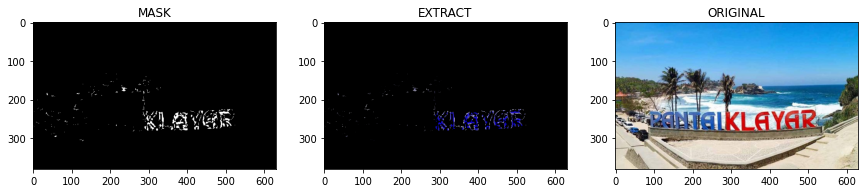

In [10]:
merah_bawah = np.array([175,0,0])
merah_atas  = np.array([185,255,255])
mask1= cv2.inRange(hsv_klayar,merah_bawah,merah_atas)
res =  cv2.bitwise_and(im_klayar,im_klayar,mask=mask1)


plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(mask1, cmap='gray');plt.title("MASK");
plt.subplot(142);plt.imshow(res);plt.title("EXTRACT");
plt.subplot(143);plt.imshow(im_klayar[:,:,::-1]);plt.title("ORIGINAL");

## Cropping

Kamu perlu mengakses file ikon kotamu yang pekan lalu di-submit. 

Pilih satu object di gambar itu (misal kalau gambar tugu jogja, pilih puncak tugunya). Lalu crop daerah itu dan tampilkan hasilnya.

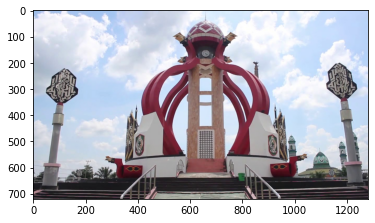

In [11]:
## Crop dan tampilkan:
img_TUGU_bgr = cv2.imread("tugu.jpg",cv2.IMREAD_COLOR)
img_TUGU_rgb = img_TUGU_bgr[:,:,::-1] 

plt.imshow(img_TUGU_rgb)

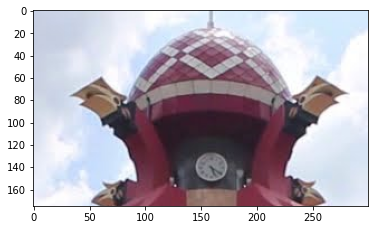

In [12]:
cropped_region = img_TUGU_rgb[25:200, 500:800]
plt.imshow(cropped_region)

## Resizing

Lakukan pengubahan ukuran gambar seperti yang di video. Pakailah hasil crop ikon kotamu sebagai gambar yang diubah ukurannya.

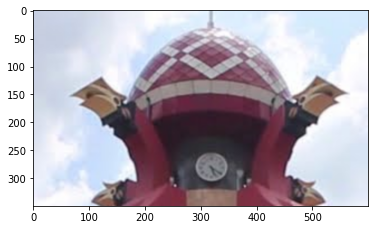

In [13]:
## Metode 1
resized_cropped_region_2x = cv2.resize(cropped_region,None,fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

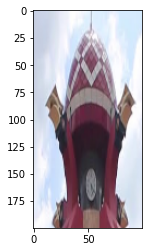

In [14]:
## Metode 2
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)


resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

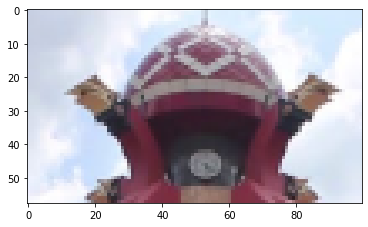

In [15]:
## Mempertahankan aspect ratio:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

#### Dalam mengubah ukuran gambar, diperlukan interpolasi. Apa itu interpolasi? Apa saja jenis interpolasi yang ada di OpenCV?


##### Jawaban: Pengertian interpolasi ialah sebuah teknik atau cara untuk mencari sebuah harga suatu fungsi pada sebuah titik yang berada di dua buah titik yang nilai fungsi dari kedua titik tersebut telah di ketahui. 

OpenCV menyediakan beberapa metoda interpolasi
- cv2.INTER_AREA: untuk shrinking atau mengecilkan gambar.
- cv2.INTER_NEAREST: metoda paling cepat
- cv2.INTER_LINEAR: untuk memperbesar gambar.
- cv2.INTER_CUBIC: kualitas baik.
- cv2.INTER_LANCZOS4: kualitas terbaik.

## Flipping Images
Memakai gambar ikon kotamu yang utuh, lakukan perputaran seperti yang di video. Tampilkan semuanya, termasuk gambar yang asli.

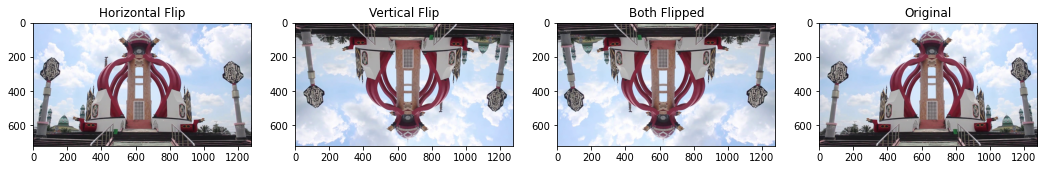

In [16]:
img_TUGU_bgr = cv2.imread("tugu.jpg",cv2.IMREAD_COLOR)
img_TUGU_rgb = img_TUGU_bgr[:,:,::-1] 

img_TUGU_rgb_flipped_horz = cv2.flip(img_TUGU_rgb, 1)
img_TUGU_rgb_flipped_vert = cv2.flip(img_TUGU_rgb, 0)
img_TUGU_rgb_flipped_both = cv2.flip(img_TUGU_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_TUGU_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_TUGU_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_TUGU_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_TUGU_rgb);plt.title("Original");